# Covid-19 Analysis  


## Summary

The coronaviruses are a type of virus. There are many different kinds, and some cause disease. A newly identified coronavirus, SARS-CoV-2, has caused a worldwide pandemic of respiratory illness, called COVID-19.

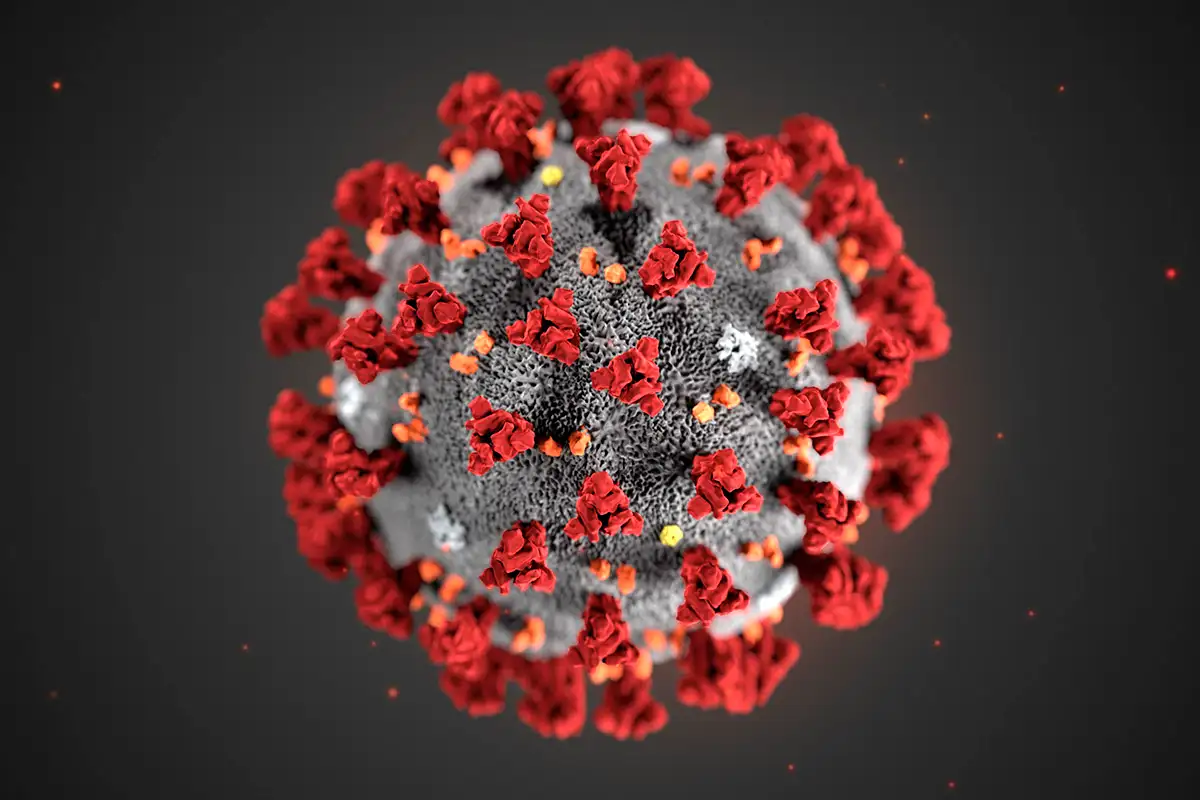

My goal is to provide a fun and intuitive display of the data behind covid. I will be using python 3, conda to manage my virtual enviroment and more.

#### Imports 

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# -*- coding: utf-8 -*-
import dash
import dash_core_components as dcc
import dash_html_components as html

#### Data  

The data I will be using is collected from the John Hopkins data repository off github (https://github.com/CSSEGISandData/COVID-19).

In [2]:
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recorved_df =  pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
country_df =  pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

#### Data Frames 

A preview of the first four columns from each data frame.

In [3]:
death_df.head() 

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/13/20  6/14/20  6/15/20  6/16/20  \
0        0        0        0  ...      451      471      478      491   
1        0        0        0  ...       36       36       36       37   
2        0        0        0  ...      760      767      777      788   
3        0        0        0  ...       51       51       51       52   
4        0        0        0  ...        6        6        6        6   

   6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  
0      504      546      548      569      581      598  
1       38       39       42       43       44       44  
2      799      811      825      837      845      852  
3       52       52       52       52       52       52  
4        7        8        8        9        9       10  

[5 rows x 157 columns]

In [4]:
confirmed_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/13/20  6/14/20  6/15/20  6/16/20  \
0        0        0        0  ...    24102    24766    25527    26310   
1        0        0        0  ...     1464     1521     1590     1672   
2        0        0        0  ...    10810    10919    11031    11147   
3        0        0        0  ...      853      853      853      854   
4        0        0        0  ...      138      140      142      148   

   6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  
0    26874    27532    27878    28424    28833    29157  
1     1722     1788     1838     1891     1962     1995  
2    11268    11385    11504    11631    11771    11920  
3      854      855      855      855      855      855  
4      155      166      172      176      183      186  

[5 rows x 157 columns]

In [5]:
recorved_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/13/20  6/14/20  6/15/20  6/16/20  \
0        0        0        0  ...     4201     4725     5164     5508   
1        0        0        0  ...     1039     1044     1055     1064   
2        0        0        0  ...     7420     7606     7735     7842   
3        0        0        0  ...      781      781      789      789   
4        0        0        0  ...       61       61       64       64   

   6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  
0     6158     7660     7962     8292     8764     8841  
1     1077     1086     1114     1126     1134     1159  
2     7943     8078     8196     8324     8422     8559  
3      791      792      792      792      792      796  
4       64       64       66       66       77       77  

[5 rows x 157 columns]

In [6]:
country_df.head()

Country_Region          Last_Update      Lat     Long_  Confirmed  Deaths  \
0      Australia  2020-06-23 19:33:23 -25.0000  133.0000     7492.0   102.0   
1        Austria  2020-06-23 19:33:23  47.5162   14.5501    17408.0   693.0   
2         Canada  2020-06-23 19:33:23  60.0010  -95.0010   103686.0  8510.0   
3          China  2020-06-23 19:33:23  30.5928  114.3055    84640.0  4640.0   
4        Denmark  2020-06-23 19:33:23  56.2639    9.5018    12761.0   603.0   

   Recovered   Active  Incident_Rate  People_Tested  People_Hospitalized  \
0     6915.0    475.0      29.426898            NaN                  NaN   
1    16261.0    454.0     193.284775            NaN                  NaN   
2    66059.0  29117.0     273.897972            NaN                  NaN   
3    79552.0    448.0       6.025587            NaN                  NaN   
4    11593.0    565.0     220.313411            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        1.361452   36  AUS  
1        3.980928   40  AUT  
2        8.207473  124  CAN  
3        5.482042  156  CHN  
4        4.725335  208  DNK

#### Data Cleaning

I will rename all the country/region columns to just country for confirmed and deaths data frames.

In [7]:
confirmed_df = confirmed_df.rename(columns = {'Country/Region': 'country'})
death_df = death_df.rename(columns = {'Country/Region': 'country'})

#### Mortality Rates per Country 

This will display the top ten countries with the highest mortality rates

In [8]:
sorted_mortality_rates_df = country_df.sort_values('Mortality_Rate', ascending = False)
sorted_mortality_rates_df

Country_Region          Last_Update        Lat       Long_  Confirmed  \
185          Yemen  2020-06-23 19:33:23  15.552727   48.516388      992.0   
116     MS Zaandam  2020-06-23 19:33:23        NaN         NaN        9.0   
42         Belgium  2020-06-23 19:33:23  50.833300    4.469936    60810.0   
6           France  2020-06-23 19:33:23  46.227600    2.213700   197804.0   
10           Italy  2020-06-23 19:33:23  41.871900   12.567400   238833.0   
..             ...                  ...        ...         ...        ...   
45          Bhutan  2020-06-23 19:33:23  27.514200   90.433600       69.0   
80            Fiji  2020-06-23 19:33:23 -17.713400  178.065000       18.0   
172    Timor-Leste  2020-06-23 19:33:23  -8.874217  125.727539       24.0   
76         Eritrea  2020-06-23 19:33:23  15.179400   39.782300      143.0   
127       Mongolia  2020-06-23 19:33:23  46.862500  103.846700      215.0   

      Deaths  Recovered   Active  Incident_Rate  People_Tested  \
185    261.0      356.0    375.0       3.325961            NaN   
116      2.0        NaN      7.0            NaN            NaN   
42    9713.0    16771.0  34326.0     524.693829            NaN   
6    29723.0    74995.0  93086.0     303.038697            NaN   
10   34675.0   184585.0  19573.0     395.014521            NaN   
..       ...        ...      ...            ...            ...   
45       0.0       32.0     37.0       8.942318            NaN   
80       0.0       18.0      0.0       2.007934            NaN   
172      0.0       24.0      0.0       1.820330            NaN   
76       0.0       39.0    104.0       4.032227            NaN   
127      0.0      158.0     57.0       6.558293            NaN   

     People_Hospitalized  Mortality_Rate   UID ISO3  
185                  NaN       26.310484   887  YEM  
116                  NaN       22.222222  8888  NaN  
42                   NaN       15.972702    56  BEL  
6                    NaN       15.026491   250  FRA  
10                   NaN       14.518513   380  ITA  
..                   ...             ...   ...  ...  
45                   NaN        0.000000    64  BTN  
80                   NaN        0.000000   242  FJI  
172                  NaN        0.000000   626  TLS  
76                   NaN        0.000000   232  ERI  
127                  NaN        0.000000   496  MNG  

[188 rows x 14 columns]

#### Hover over the for more details.

In [9]:
bubble_fig = px.scatter(sorted_mortality_rates_df.head(10), x='Country_Region', y='Mortality_Rate', size='Mortality_Rate', color='Country_Region', hover_name='Country_Region', title='Mortality Rates by Country')

bubble_fig.show()

In [10]:
bar_fig = px.bar(sorted_mortality_rates_df.head(10), x='Country_Region', y='Mortality_Rate', color='Country_Region', title='Mortality Rates by Country')
bar_fig.show()

In [11]:
def plot_cases_per_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ))
        
    fig.show()
    

plot_cases_per_country('US')
    

#### 10 worst hit countries - Confirmed cases

In [12]:
sorted_confirmed_cases = country_df.sort_values('Confirmed', ascending = False)
px.bar(
    sorted_confirmed_cases.head(10),
    x = "Country_Region",
    y = "Confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=800
)

#### Getting started with Viola

Voilà is able to turn Jupyter notebooks into standalone web applications.



